In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!cp -r drive/MyDrive/newz-aware/ /content/newz-aware

In [4]:
%cd newz-aware/

/content/newz-aware


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 13.9 MB 17.8 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 9.9 MB 45.0 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 57.5 MB/s 
     |████████████████████████████████| 61 kB 8.1 MB/s 
     |████████████████████████████████| 133 kB 70.7 MB/s 
     |████████████████████████████████| 181 kB 72.5 MB/s 
     |████████████████████████████████| 11.2 MB 51.2 MB/s 
     |████████████████████████████████| 1.5 MB 42.4 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.22.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 16.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [8]:
df = pd.read_csv('TrainingData/scrapedDataset.csv')

X = df['title']
y = df['bias']

## Preprocessing

In [9]:
import spacy
from nltk.corpus import stopwords
import re

class PreProcessor:

    def __init__(self, lang = 'english'):
        self.nlp = spacy.load('en_core_web_sm')
        self.stop_words = set(stopwords.words(lang))

    def remove_special_chars(self, doc):

        doc = " ".join(re.findall(r'[a-zA-Z0-9]+', doc))
        return doc.lower()

    def lemmatize(self, doc):
        doc = self.nlp(doc)
        tokenized = [token.lemma_ for token in doc]
        return tokenized

    def remove_stop_words(self, tokenized_doc):

        tokenized_doc_no_stopwords = []

        for word in tokenized_doc:
            if word not in self.stop_words:
                tokenized_doc_no_stopwords.append(word)

        return tokenized_doc_no_stopwords

    def forward(self, doc):
        doc = self.remove_special_chars(doc)
        doc = self.lemmatize(doc)
        doc = self.remove_stop_words(doc)

        return " ".join(doc)

preproc = PreProcessor()

for i,x in enumerate(X):
    X[i] = preproc.forward(str(X[i]))
    print(i+1)

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
1

0    zimmerman verdict renew focus stand -PRON- gro...
1    senate immigration bill pass judiciary committ...
2    let doma fool -PRON- supreme court restrict -P...
3    obamacare trouble exchange provision delay law...
4    exclusive immigration agent rip house lawmaker...
Name: title, dtype: object

In [10]:
y.replace(to_replace = list(range(-4,5)), value=[0,0,0,1,1,1,2,2,2], inplace=True)
y.value_counts()

1    17510
2     1878
0     1616
Name: bias, dtype: int64

In [11]:
df = pd.concat([X,y], axis=1)
df

,title,bias
0,zimmerman verdict renew focus stand -PRON- gro...,1
1,senate immigration bill pass judiciary committ...,1
2,let doma fool -PRON- supreme court restrict -P...,1
3,obamacare trouble exchange provision delay law...,1
4,exclusive immigration agent rip house lawmaker...,1
...,...,...
20999,dana milbank senator turn table cayman investo...,2
21000,republicans hatred obama blind -PRON- public d...,2
21001,dana milbank stockman step forward republicans...,1
21002,e j dionne republicans problem solver washingt...,2


In [12]:
df.drop(df[df['title']=='nan'].index, inplace=True)

In [13]:
y.value_counts()

1    17510
2     1878
0     1616
Name: bias, dtype: int64

### Balancing the class counts

In [14]:
df_class0 = df[df['bias'] == 0]
df_class1 = df[df['bias'] == 1]
df_class2 = df[df['bias'] == 2]

In [15]:
df_class0_oversampled = df_class0.sample(df_class1.shape[0], replace = True)
df_class2_oversampled = df_class2.sample(df_class1.shape[0], replace = True)

print(df_class0_oversampled.shape)
print(df_class2_oversampled.shape)

(12098, 2)
(12098, 2)


In [16]:
df_oversampled = pd.concat([df_class1, df_class0_oversampled, df_class2_oversampled], axis = 0)
print(df_oversampled.shape)
print(df_oversampled['bias'].value_counts())

(36294, 2)
1    12098
0    12098
2    12098
Name: bias, dtype: int64


In [17]:
df = df_oversampled

In [18]:
X = df['title']
y = df['bias']

In [19]:
X

0        zimmerman verdict renew focus stand -PRON- gro...
1        senate immigration bill pass judiciary committ...
2        let doma fool -PRON- supreme court restrict -P...
3        obamacare trouble exchange provision delay law...
4        exclusive immigration agent rip house lawmaker...
                               ...                        
18718             jon stewart show insane tea party become
6589     shift stance back immigration overhaul reid re...
19201    reid leahy reiterate nuclear option threat dc ...
19426    jon huntsman could without bill clinton kudos ...
1673       obama overcome poverty violence hard cnnpolitic
Name: title, Length: 36294, dtype: object

### One hot encoding

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [21]:
vocab_size = 10000

In [22]:
one_hot_repr = [one_hot(title, vocab_size) for title in X]
one_hot_repr

[[980, 45, 1911, 4407, 6014, 4287, 6259, 6410],
 [5435, 4596, 6675, 3498, 7615, 3629, 5899, 1191, 2100],
 [1680, 4721, 4019, 4287, 4206, 2147, 2421, 4287, 9700, 2099, 5143],
 [1811, 8716, 8294, 2543, 7271, 3540, 718, 9313, 3099, 9736, 2100],
 [8167, 4596, 813, 9531, 4234, 3540, 718, 9923],
 [5039, 6753, 1680, 8393, 1602, 7597, 4012, 7911, 6858],
 [9899, 6675, 2882, 5438, 3498, 8964, 4234, 3981, 2100],
 [7597, 1680, 905, 4622, 822, 5503, 5091, 4754, 5584, 3085, 2508],
 [9108, 6037, 1190, 7550, 4905, 7671, 308, 1145, 3981, 2100, 6890, 616, 2963],
 [9892, 2513, 323, 1776, 1446, 6692],
 [5435, 2107, 7376, 8633, 2147, 7123, 3820, 8914, 6388],
 [4064, 703, 4999, 4829, 5842, 1272, 244, 2873, 2099, 5143],
 [2799, 4405, 968, 4928, 782, 3410, 4734, 6240, 3141, 5982, 5899, 1191, 2100],
 [3283, 8857, 727, 5458, 2239, 38, 2200, 9731, 9120, 5899, 1191, 2100],
 [6037, 7222, 1265, 2345, 7063, 1601, 771, 3820, 8914, 6388],
 [4463, 1545, 4449, 7460, 6913, 1870, 3434, 3556, 6459, 7454, 9736, 2100],
 [820

In [23]:
max([len(x) for x in one_hot_repr])

19

In [24]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_repr, padding='pre', maxlen = sent_length)
embedded_docs

array([[   0,    0,    0, ..., 4287, 6259, 6410],
       [   0,    0,    0, ..., 5899, 1191, 2100],
       [   0,    0,    0, ..., 9700, 2099, 5143],
       ...,
       [   0,    0,    0, ..., 5315, 8472, 8445],
       [   0,    0,    0, ..., 3820, 8914, 6388],
       [   0,    0,    0, ..., 7672, 2898, 6858]], dtype=int32)

In [25]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)

#### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

train_X, t_X, train_y, t_y = train_test_split(embedded_docs, y, test_size=0.2, stratify=y, random_state=101)
test_X, dev_X, test_y, dev_y = train_test_split(t_X, t_y, test_size=0.5, stratify=t_y, random_state=101)

In [27]:
train_X.shape

(29035, 20)

## Training

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

embedding_vector_features = 40
model = Sequential([
                Embedding(vocab_size, embedding_vector_features, input_length=sent_length),
                LSTM(100),
                Dense(16, activation='relu'),
                Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            400000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dense_6 (Dense)             (None, 16)                1616      
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 458,067
Trainable params: 458,067
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(train_X, train_y, validation_data=(dev_X, dev_y), epochs=20, batch_size=64)

Epoch 1/20
454/454 [==============================] - 70s 36ms/step - loss: 0.7852 - accuracy: 0.6383 - val_loss: 0.5713 - val_accuracy: 0.7562
Epoch 2/20
454/454 [==============================] - 16s 34ms/step - loss: 0.4732 - accuracy: 0.8079 - val_loss: 0.4364 - val_accuracy: 0.8218
Epoch 3/20
454/454 [==============================] - 15s 33ms/step - loss: 0.3822 - accuracy: 0.8445 - val_loss: 0.3963 - val_accuracy: 0.8377
Epoch 4/20
454/454 [==============================] - 15s 32ms/step - loss: 0.3436 - accuracy: 0.8602 - val_loss: 0.3943 - val_accuracy: 0.8504
Epoch 5/20
454/454 [==============================] - 15s 33ms/step - loss: 0.3242 - accuracy: 0.8686 - val_loss: 0.3770 - val_accuracy: 0.8612
Epoch 6/20
454/454 [==============================] - 15s 34ms/step - loss: 0.3107 - accuracy: 0.8724 - val_loss: 0.3643 - val_accuracy: 0.8672
Epoch 7/20
454/454 [==============================] - 15s 32ms/step - loss: 0.3004 - accuracy: 0.8765 - val_loss: 0.3718 - val_accuracy:

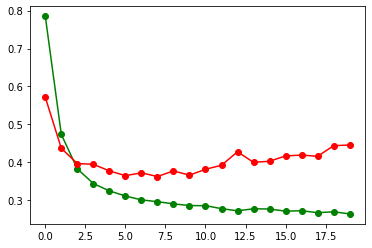

In [52]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_loss']))), history.history['val_loss'], 'r-o', label='Validation')
plt.savefig('losses.png')

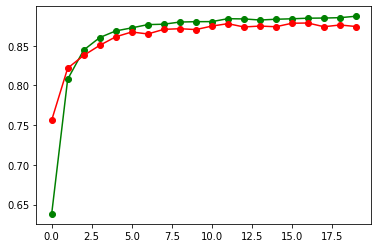

In [53]:
plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_accuracy']))), history.history['val_accuracy'], 'r-o', label='Validation')
plt.savefig('accuracies.png')

## Evaluation

In [54]:
test_pred = model.predict(test_X)

In [55]:
test_y_orig = []
test_pred_orig = []

for i,pred in enumerate(test_y):
    test_y_orig.append(np.argmax(pred))

for i,pred in enumerate(test_pred):
    test_pred_orig.append(np.argmax(pred))

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_y_orig, test_pred_orig))
print(classification_report(test_y_orig, test_pred_orig))

[[1103   46   60]
 [ 100  962  148]
 [  46   48 1116]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1209
           1       0.91      0.80      0.85      1210
           2       0.84      0.92      0.88      1210

    accuracy                           0.88      3629
   macro avg       0.88      0.88      0.88      3629
weighted avg       0.88      0.88      0.88      3629



In [57]:
model.save("LSTMModel")

INFO:tensorflow:Assets written to: LSTMModel/assets


INFO:tensorflow:Assets written to: LSTMModel/assets


In [58]:
import shutil
shutil.make_archive('LSTMModel', 'zip', 'LSTMModel')

'/content/newz-aware/LSTMModel.zip'